In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

import os

import numpy as np
import pandas as pd

import umap
import MulticoreTSNE

First we'll get the data using git clone.  For those of you on systems that can't make command line calls you'll have to pull the repo via some alternate means.

We'll add a getTheData boolean so that if you've already run the notebook then you won't accidently clone it a second time.

In [2]:
if not os.path.exists('fashion_mnist'):
    !git clone https://github.com/zalandoresearch/fashion-mnist.git fashion_mnist

Cloning into 'fashion_mnist'...
remote: Counting objects: 588, done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 588 (delta 0), reused 0 (delta 0), pack-reused 584
Receiving objects: 100% (588/588), 105.14 MiB | 2.06 MiB/s, done.
Resolving deltas: 100% (332/332), done.


Now we jump into the directory you've just created via the clone command above.  If you pulled the repository in another way feel free to swap the 'fashion-mnist' path below for the appropriate one on your system.

In [3]:
import fashion_mnist.utils.mnist_reader as mnist_reader 

train, train_labels = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
test, test_labels = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.array(np.hstack([train_labels, test_labels]))

In [4]:
%%time
embedding = umap.UMAP(n_neighbors=5, metric='euclidean', random_state=42).fit_transform(data)

CPU times: user 1min 27s, sys: 3.33 s, total: 1min 30s
Wall time: 1min 18s


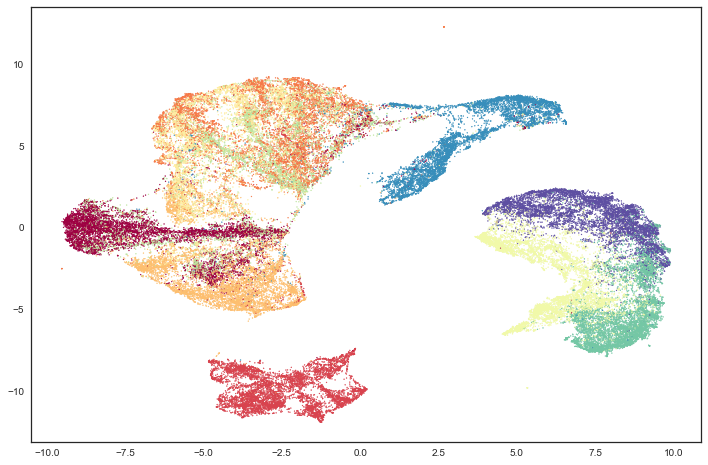

In [5]:
plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap="Spectral", s=1)

In [6]:
np.save('umap_fashion_mnist_embedding1.npy', embedding)

In [7]:
output = pd.DataFrame(embedding, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_fashion_mnist_umap1.csv')

### T-SNE

In [8]:
fit_tsne = MulticoreTSNE.MulticoreTSNE(n_jobs=1, random_state=42)
%time u_tsne = fit_tsne.fit_transform(data)

CPU times: user 14min 47s, sys: 18 s, total: 15min 5s
Wall time: 15min 6s


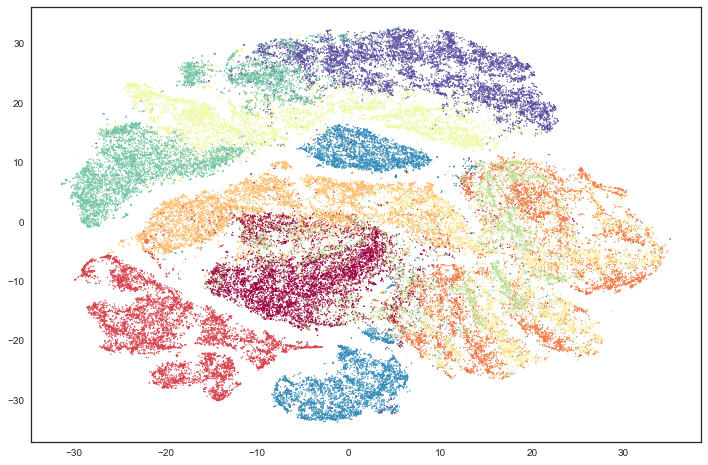

In [9]:
plt.scatter(u_tsne[:,0], u_tsne[:,1], c=target, cmap="Spectral", s=1)

In [10]:
np.save('tsne_fashion_mnist_embedding1.npy', u_tsne)

In [11]:
output = pd.DataFrame(u_tsne, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_fashion_mnist_tsne1.csv')